**Подключение библиотек и скриптов**

In [151]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

функция для постоения графиков

In [152]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**Пути к директориям и файлам**

In [153]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [154]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [155]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [156]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

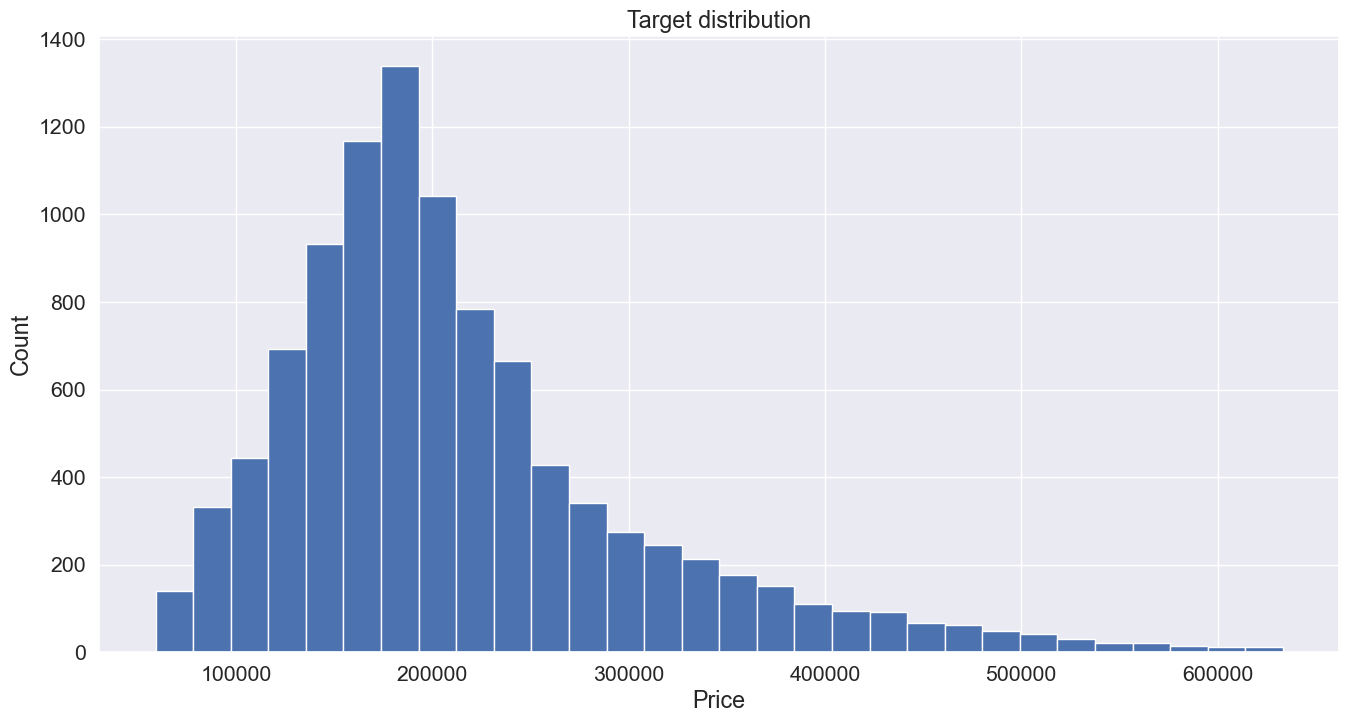

In [157]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

### обработка пропусков

In [158]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Жилая площадь не может быть больше общей площади, скорее всего они перепутаны, поэтому поменяем местами

In [160]:
m = train_df['Square']<train_df['LifeSquare']
train_df.loc[m, ['Square', 'LifeSquare']] = train_df.loc[m, ['LifeSquare', 'Square']].to_numpy()

In [161]:
len(train_df[train_df['Square']<train_df['LifeSquare']])

0

Чтобы заполнить пропуски в жилой площади посмотрим как она коррелирует в общей

(0.0, 500.0)

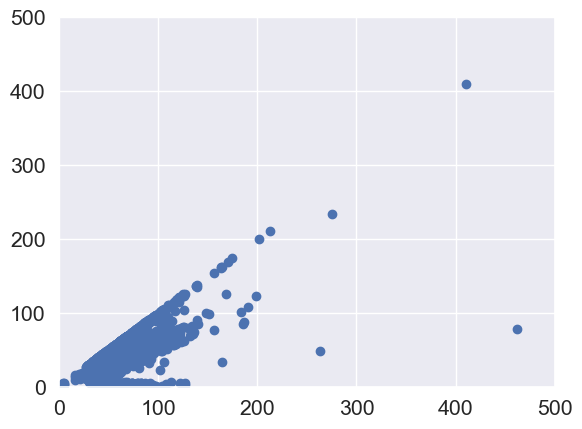

In [162]:
plt.scatter(train_df['Square'], train_df['LifeSquare'])
plt.ylim(0,500)
plt.xlim(0,500)

Заполнили пропуски: LifeSquare = общая площадь минус медиана среднего

In [163]:
a = (train_df['Square'] - train_df['LifeSquare']).median()
train_df['LifeSquare'] = train_df['LifeSquare'].fillna(train_df['Square'] - a)

удаляем признак 'Healthcare_1' т.к. там слишком много пропусков (половина значений Nan)

In [164]:
del train_df['Healthcare_1']

### Обработка выбросов

In [165]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

есть неправдоподобные значения комнат (по сравнию с площадью)

In [166]:
train_df[train_df['Rooms']>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8794,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416


есть значения с нулевым кол-вом комнат

In [167]:
train_df[train_df['Rooms']== 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
3780,7317,27,0.0,41.790881,23.308843,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
5894,770,28,0.0,49.483501,31.001463,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
7929,456,6,0.0,81.491446,63.009409,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
9767,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798


Напишем функцию:
Заменяем где ноль комнат, на среднюю +-10 по площади

Заменяем где слишком много комнат но маленькая площадь, аналогично

In [168]:
def adapt_rooms(max_rooms, df):
    index_rooms_max = list(df[df['Rooms']>max_rooms].index)
    index_rooms_0 = list(df[df['Rooms']==0].index)
    for i in index_rooms_max:
        min_sq = df[df['Rooms']>max_rooms].loc[i]['Square']-10
        max_sq = df[df['Rooms']>max_rooms].loc[i]['Square']+10
        means = round(df[(df['Square']<max_sq) | (df['Square']<min_sq)]['Rooms'].mean(), 0)
        df['Rooms'].loc[i] = means
    
    for n in index_rooms_0:
        min_sq = df[df['Rooms']==0].loc[n]['Square']-10
        max_sq = df[df['Rooms']==0].loc[n]['Square']+10
        means = round(df[(df['Square']<max_sq) | (df['Square']<min_sq)]['Rooms'].mean(), 0)
        df['Rooms'].loc[n] = means
    return df

In [169]:
train_df = adapt_rooms(5, train_df)

In [170]:
train_df.sort_values(by=['Square']).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
9869,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4496,15744,34,1.0,2.642219,1.988943,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,1,11,B,458378.777006
7470,14786,1,1.0,4.525736,1.136859,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8572,10202,6,1.0,4.604943,2.596351,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
4800,7657,38,1.0,4.618547,4.502784,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,483283.488083


In [171]:
train_df.sort_values(by=['LifeSquare']).head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8501,12927,62,2.0,17.414181,-1.067857,1.0,4,20.0,1977,0.072158,B,B,2,629,1,0,0,A,180750.471749
3113,13491,0,1.0,38.178277,0.370619,0.0,19,17.0,2016,0.006076,B,B,30,5285,0,6,6,B,105134.286994
1829,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,0,0,A,337299.867936
119,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,B,B,5,1564,0,0,0,B,174741.998061
9869,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798


Заменим одно отрицательное значение

In [172]:
train_df['LifeSquare'].loc[8501] = train_df['Square'].loc[8501]

In [173]:
train_df.sort_values(by=['KitchenSquare']).head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2178,7839,23,1.0,32.689327,30.176004,0.0,4,12.0,2018,0.034656,B,B,0,168,0,0,0,B,63624.320283
5612,5876,6,2.0,52.676642,34.194604,0.0,10,17.0,1977,0.243205,B,B,5,1564,0,0,0,B,144395.616643
519,1544,34,2.0,58.389258,39.907220,0.0,6,25.0,2017,0.069753,B,B,53,13670,4,1,11,B,245634.410191
8814,12931,52,3.0,83.633188,83.277723,0.0,4,17.0,1977,0.371149,B,B,34,7065,1,2,5,B,188140.019560
3709,2581,95,2.0,78.946184,60.464146,0.0,3,0.0,1977,0.341072,B,B,27,5664,48,3,11,B,475193.767384


In [174]:
train_df.sort_values(by=['KitchenSquare']).tail(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7733,12552,58,3.0,116.405693,113.109653,112.0,3,3.0,2016,0.437885,B,B,23,5735,3,0,5,B,296165.936689
5002,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,0,0,A,315245.521059
286,2737,27,3.0,125.806981,123.430072,123.0,5,10.0,2015,0.017647,B,B,2,469,0,0,0,B,234194.837047
6505,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275
9520,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207


не может быть площадь кухни быть больше чем общая площадь

нулевые площади тоже заменим на средние - напишем функцию

In [175]:
train_df[train_df['Square']<train_df['KitchenSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2785,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,0,0,B,99079.960518
5273,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,1,0,B,160488.033165
6505,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275
9520,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207


In [176]:
def adapt_кitchensquare(df):
    index_kit = list(df[df['Square']<df['KitchenSquare']].index)
    index_kit_0 = list(df[df['KitchenSquare']==0].index)
    for i in index_kit:
        df['KitchenSquare'].loc[i] = df['Square'].loc[i] - df['LifeSquare'].loc[i]
        
    for n in index_kit_0:
        min_sq = df[df['KitchenSquare']==0].loc[n]['Square']-10
        max_sq = df[df['KitchenSquare']==0].loc[n]['Square']+10
        means = df[(df['Square']<max_sq) | (df['Square']<min_sq)]['KitchenSquare'].mean()
        df['KitchenSquare'].loc[n] = means
    return df

In [177]:
train_df = adapt_кitchensquare(train_df)

Кол-во этажей в доме тоже где ноль, заменим на средние по году постройки

In [178]:
train_df[train_df['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
24,4717,27,1.0,44.203947,25.721909,5.527451,2,0.0,1977,0.072158,B,B,2,629,1,0,0,A,135466.559958
152,12947,53,2.0,56.023342,37.541304,5.614415,14,0.0,1977,0.049637,B,B,34,7759,0,1,3,B,247074.564832
159,13146,74,1.0,46.449711,27.967673,5.614766,6,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,168705.450148
186,12174,62,1.0,44.954880,26.472842,5.570946,8,0.0,1977,0.072158,B,B,2,629,1,0,0,A,133773.301722
229,15661,45,3.0,81.094922,62.612884,5.748114,15,0.0,1977,0.195781,B,B,23,5212,6,3,2,B,442472.456032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,629,27,1.0,42.936724,24.454686,5.797892,2,0.0,1977,0.011654,B,B,4,915,0,0,0,B,129674.841139
9931,15686,1,1.0,47.402412,28.920374,5.957184,14,0.0,1977,0.007122,B,B,1,264,0,0,1,B,174740.301224
9940,4711,6,1.0,41.224118,22.742080,5.775023,8,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,125612.639104
9950,5383,48,3.0,98.994909,80.512871,6.190658,3,0.0,1977,0.041125,B,B,46,9515,5,1,10,B,418817.004446


In [179]:
def adapt_housefloor(df):
    index_house_0 = list(df[df['HouseFloor']==0].index)  
    for n in index_house_0:
        means = round(df[(df['HouseYear'] == df['HouseYear'].loc[n])]['HouseFloor'].mean(),0)
        df['HouseFloor'].loc[n] = means
    return df

In [180]:
train_df = adapt_housefloor(train_df)

заменим HouseYear больше 2022 на 2022г

In [181]:
train_df[train_df['HouseYear']>2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396


In [182]:
train_df.loc[train_df['HouseYear'] > 2022, 'HouseYear'] = 2022

### Построение новых признаков

Заменим буквенные обозначения на булевые значения

In [183]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

In [184]:
del train_df['Ecology_2']
del train_df['Ecology_3']
del train_df['Shops_2']

In [185]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,11809,27,3.0,115.027311,96.545273,10.0,4,10.0,2014,0.075424,11,3097,0,0,0,305018.871089,1,1,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1,0,177734.553407,1,1,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,3,1,282078.720850,1,1,1
3,2352,1,1.0,40.409907,21.927869,1.0,10,22.0,1977,0.007122,1,264,0,0,1,168106.007630,1,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,0,6,343995.102962,1,1,1


### Уменьшение объема памяти, который занимает датасет

In [186]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [187]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 1.45 MB
Memory usage after optimization is: 0.43 MB
Decreased by 70.4%


In [188]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin']

выбор признаков

In [189]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2_bin']
target_name = 'Price'

In [190]:
X = train_df[feature_names]
y = train_df[target_name]

Разбиение на трениров и тестовый датасет

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

Постиотрим распределение признаков

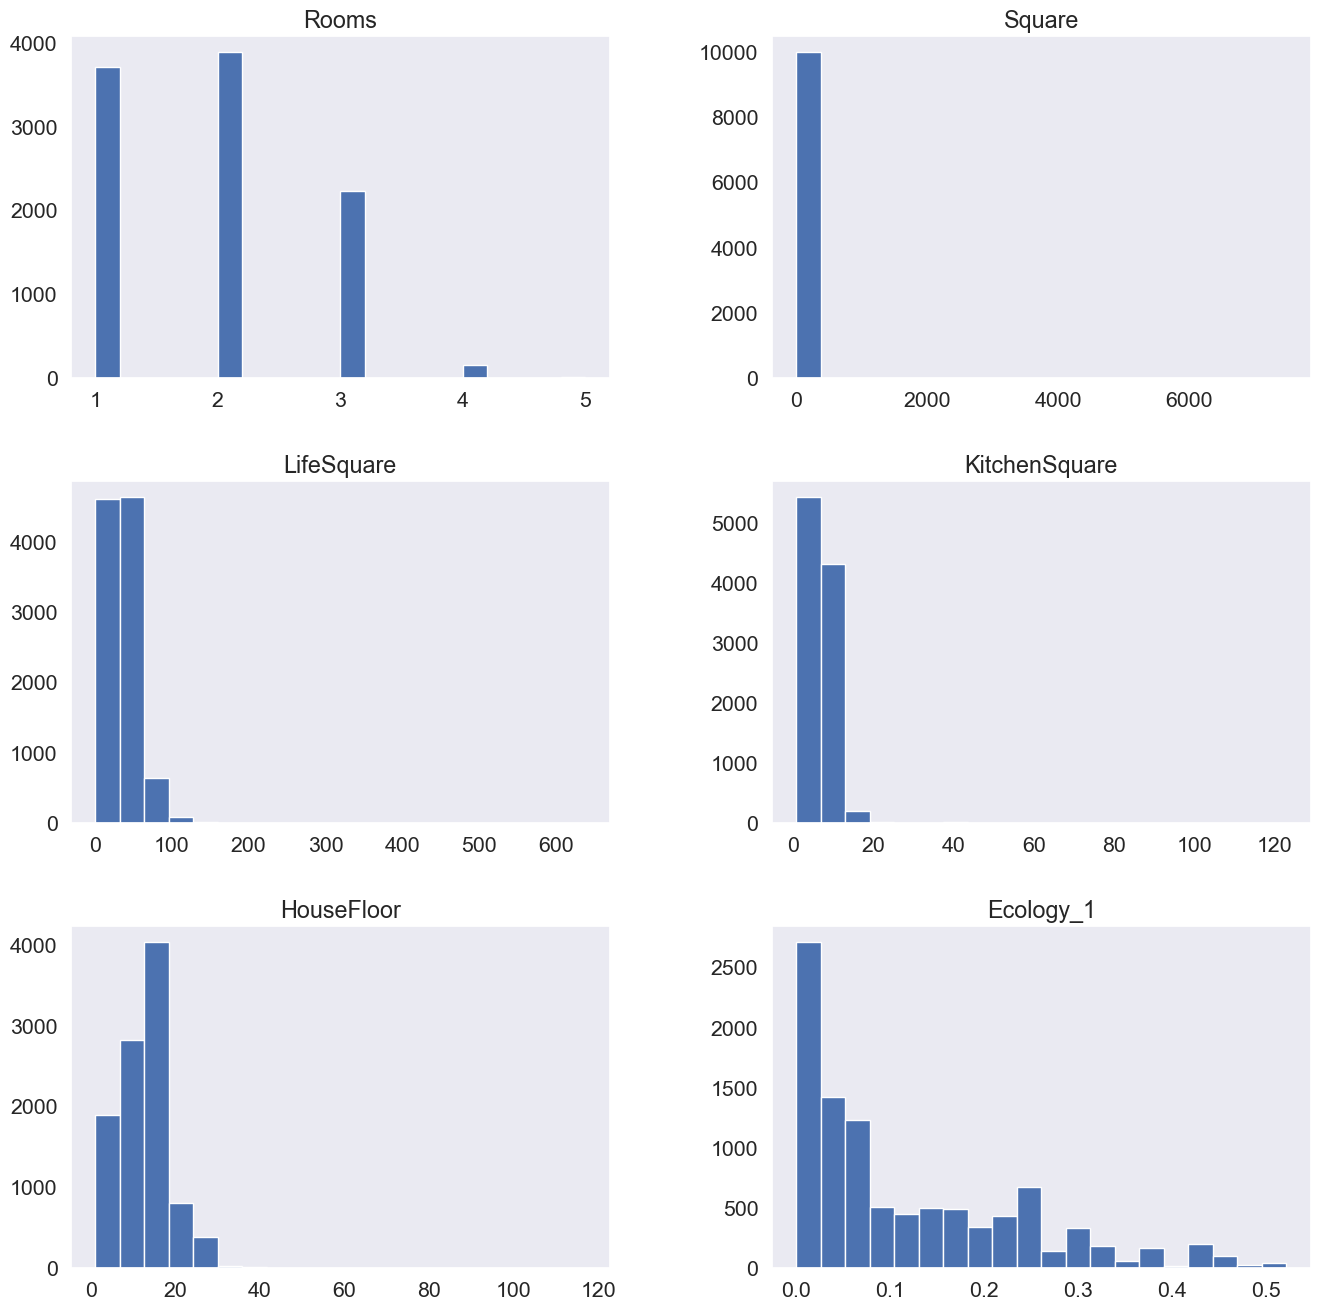

In [192]:
df_num_features = train_df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('Price', axis=1, inplace=True)
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [193]:
Тепловая матрица

SyntaxError: invalid syntax (3525134874.py, line 1)

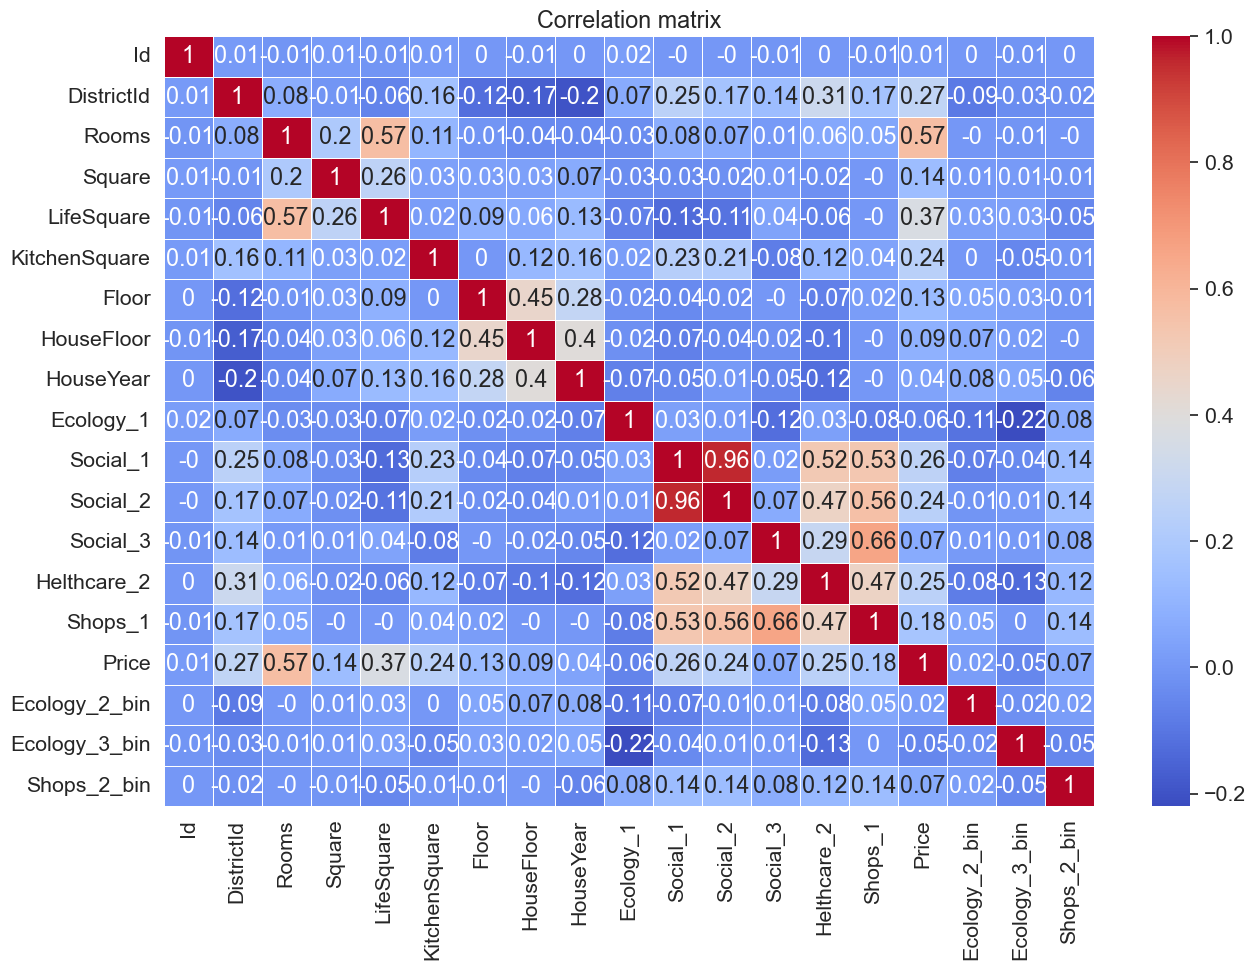

In [194]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
# corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

построение модели

Train R2:	0.959
Test R2:	0.726


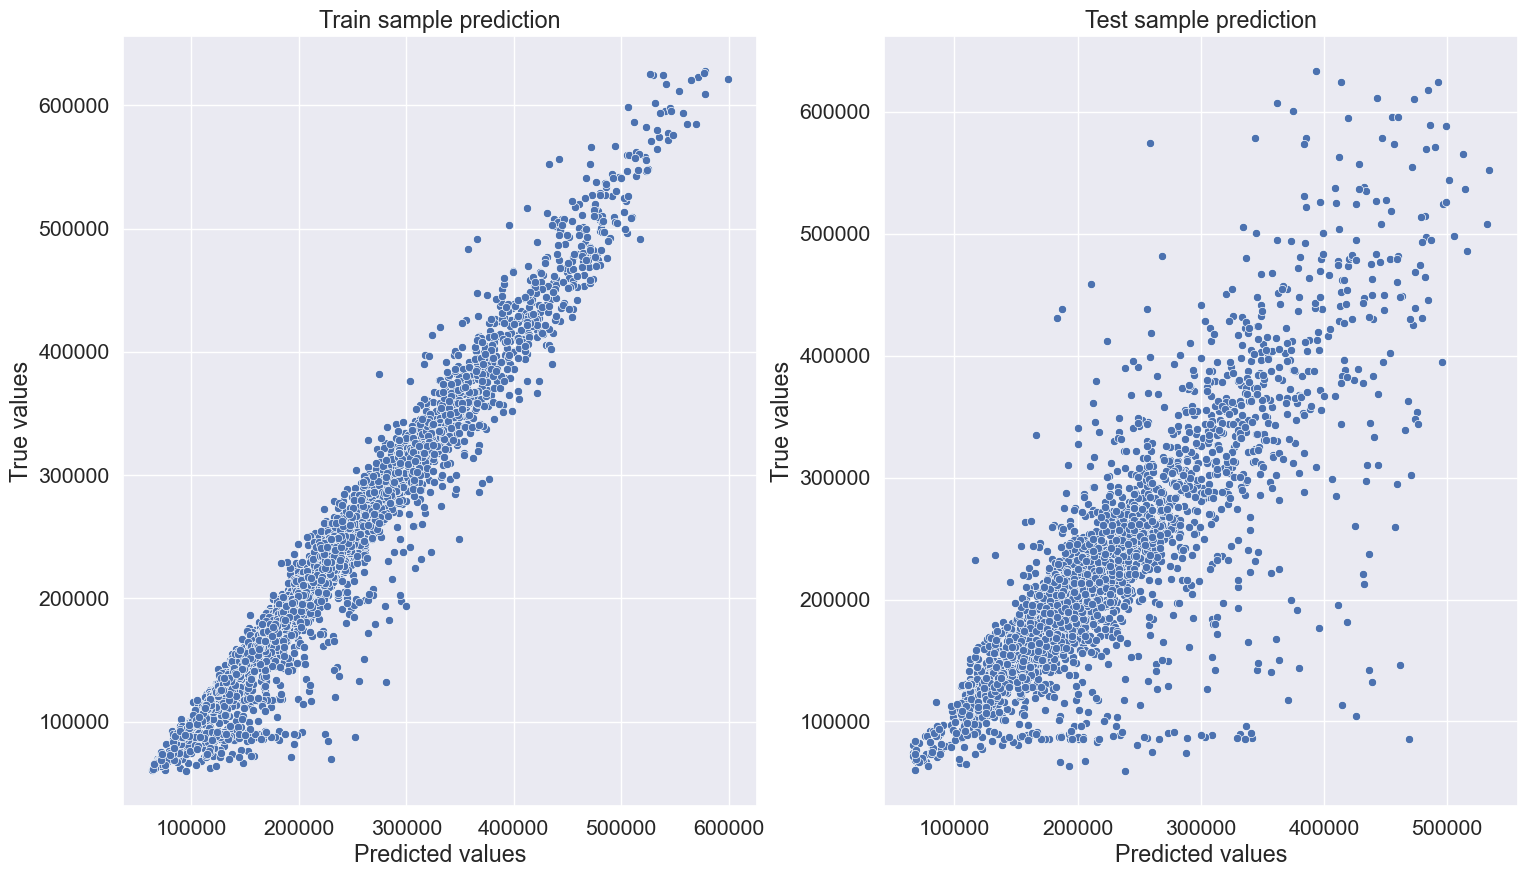

In [195]:
rf_model = RandomForestRegressor(random_state=21)
rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

Важность признаков

In [196]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.380590
11,Social_2,0.107964
10,Social_1,0.101869
0,Rooms,0.083927
12,Social_3,0.062588
7,Ecology_1,0.048728
6,HouseYear,0.046312
2,LifeSquare,0.043242
4,Floor,0.030440
3,KitchenSquare,0.030072


R2 = неплохой результат, применим на тестовом датасете

In [197]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


Проделаем такую же подготовку, что и на тренировочном датасете

In [198]:
test_df[test_df['Square']<test_df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
25,14686,1,3.0,77.229885,79.958685,1.0,18,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
28,10869,23,3.0,78.001888,82.566322,1.0,21,25.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B
39,16384,1,2.0,52.773671,52.910722,10.0,6,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
48,15509,27,2.0,55.439861,57.527243,10.0,15,17.0,2016,0.011654,B,B,4,915,0,NaN,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,15984,23,3.0,104.786355,106.730272,1.0,14,25.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
4945,9888,45,2.0,60.501260,60.881119,10.0,24,24.0,2016,0.195781,B,B,23,5212,6,NaN,3,2,B
4970,13494,169,1.0,47.012027,47.372332,8.0,4,17.0,2019,0.178917,B,B,18,3594,4,192.0,1,5,B
4979,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B


In [199]:
m = test_df['Square']<test_df['LifeSquare']
test_df.loc[m, ['Square', 'LifeSquare']] = test_df.loc[m, ['LifeSquare', 'Square']].to_numpy()

In [200]:
len(test_df[test_df['Square']<test_df['LifeSquare']])

0

In [201]:
a = (test_df['Square'] - test_df['LifeSquare']).median()
test_df['LifeSquare'] = test_df['LifeSquare'].fillna(test_df['Square'] - a)

In [202]:
del test_df['Healthcare_1']

In [203]:
test_df[test_df['Rooms']>10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1981,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [204]:
test_df = adapt_rooms(10, test_df)

In [205]:
test_df.sort_values(by=['Square']).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2463,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
3608,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,0,0,B
1672,1420,45,1.0,2.900371,1.975769,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,3,2,B
131,16401,30,1.0,4.338755,2.645046,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,3,23,B
4193,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,0,0,B


In [206]:
test_df.sort_values(by=['LifeSquare']).head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
4088,6553,34,5.0,122.375273,0.333490,0.0,9,0.0,1977,0.069753,B,B,53,13670,4,1,11,B
4397,6406,27,2.0,66.469510,0.567267,0.0,4,0.0,2018,0.017647,B,B,2,469,0,0,0,B
3284,3028,9,1.0,43.348348,0.809265,0.0,16,17.0,2015,0.161532,B,B,25,5648,1,2,4,B
1537,13014,53,3.0,81.141636,0.863989,0.0,10,1.0,2017,0.049637,B,B,34,7759,0,1,3,B
752,14959,1,2.0,64.112441,1.181139,1.0,13,17.0,1977,0.007122,B,B,1,264,0,0,1,B


In [207]:
test_df.sort_values(by=['KitchenSquare']).head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
885,8376,74,2.0,73.515949,55.160445,0.0,6,0.0,1977,0.075779,B,B,6,1437,3,0,2,B
4466,5635,23,1.0,37.100633,18.745129,0.0,4,3.0,1977,0.005767,B,B,1,388,0,0,0,B
2308,5818,6,1.0,39.471107,2.206310,0.0,6,17.0,2016,0.243205,B,B,5,1564,0,0,0,B
2208,4659,74,1.0,52.103243,33.747739,0.0,8,0.0,1977,0.075779,B,B,6,1437,3,0,2,B
3294,1851,27,2.0,57.345981,54.716137,0.0,9,9.0,1977,0.011654,B,B,4,915,0,0,0,B


In [208]:
test_df.sort_values(by=['KitchenSquare']).tail(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1224,8015,27,1.0,66.099096,33.639611,62.0,3,7.0,2016,0.014058,B,B,1,290,0,0,0,B
4127,5260,73,3.0,69.358242,51.247581,65.0,6,6.0,1931,0.042032,B,B,37,6856,84,2,5,B
4342,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,0,0,B
4227,3341,62,3.0,112.247841,112.114019,112.0,3,3.0,2017,0.072158,B,B,2,629,1,0,0,A
3750,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B


In [209]:
test_df[test_df['Square']<test_df['KitchenSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
337,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,1,2,B
3332,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,0,0,B
3750,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B
4342,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,0,0,B


In [210]:
test_df = adapt_кitchensquare(test_df)

In [211]:
test_df[test_df['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
52,15989,62,1.0,47.095406,28.739901,5.542574,4,0.0,1977,0.072158,B,B,2,629,1,0,0,A
61,12694,27,3.0,83.670032,46.358356,5.766271,8,0.0,2015,0.072158,B,B,2,629,1,0,0,A
93,6257,62,1.0,43.835919,25.480415,5.415878,9,0.0,1977,0.072158,B,B,2,629,1,0,0,A
95,902,27,3.0,99.293191,80.937687,5.779202,2,0.0,1977,0.075424,B,B,11,3097,0,0,0,B
164,2559,23,2.0,73.868460,55.512956,5.718559,9,0.0,1977,0.075779,B,B,6,1437,3,0,2,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,6187,45,3.0,79.798209,61.442704,6.105518,17,0.0,1977,0.195781,B,B,23,5212,6,3,2,B
4817,11475,27,1.0,53.263561,34.908057,5.990733,9,0.0,1977,0.072158,B,B,2,629,1,0,0,A
4928,13900,169,1.0,48.530248,30.174744,5.900920,8,0.0,1977,0.178917,B,B,18,3594,4,1,5,B
4951,113,27,2.0,65.548249,35.071278,5.973785,17,0.0,1977,0.017647,B,B,2,469,0,0,0,B


In [212]:
test_df = adapt_housefloor(test_df)

In [213]:
test_df[test_df['HouseYear']>2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [214]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [215]:
del test_df['Ecology_2']
del test_df['Ecology_3']
del test_df['Shops_2']

In [216]:
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 0.69 MB
Memory usage after optimization is: 0.20 MB
Decreased by 71.5%


In [217]:
predictions = rf_model.predict(test_df[feature_names])
predictions

array([155143.418125  , 110229.78460937, 142140.51257812, ...,
       147546.97703125, 189878.8328125 , 281300.648125  ])

In [218]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,4567,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,24,4378,0,1,1,1,1,1
1,5925,62,1.0,42.568134,42.493908,10.0,7,17.0,2017,0.072158,2,629,1,0,0,1,1,0
2,960,27,2.0,59.463676,41.108173,9.0,19,19.0,1977,0.211401,9,1892,0,0,1,1,1,1
3,3848,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,2,475,0,0,0,1,1,1
4,746,74,1.0,53.837055,35.481552,1.0,8,17.0,1977,0.309479,35,7715,4,0,6,1,1,1


проделаем прогноз и запишем результат

In [219]:
results = pd.DataFrame({'Id' : test_df['Id'],'Price' : list(predictions)})
results

,Id,Price
0,4567,155143.418125
1,5925,110229.784609
2,960,142140.512578
3,3848,128512.514141
4,746,204531.227344
...,...,...
4995,10379,177021.605859
4996,16138,355173.811563
4997,3912,147546.977031
4998,5722,189878.832813


In [220]:
results.to_csv('rf_results.csv', index=False)